In [3]:
from jax import random
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer
from src.utils.autoencoder_manager import  restore_model_state
import numpy as np

batch_size = 128
latent_dim = 20
rng = random.PRNGKey(0)
binary_vae = model(latents=latent_dim)
input_shape = (batch_size, 14, 14, 1)
learning_rate = 3e-5

train_dataset = MNISTDataset(split='train', batch_size=batch_size, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=batch_size, image_size=(14, 14)).load()
trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)

state = restore_model_state('./weights/binary_vae_500epoch_3e-5lr/checkpoint_500', trainer.state)
params = state.params

Checkpoint restored from directory '/home/uribagi/Latent-IQP/weights/binary_vae_500epoch_3e-5lr/checkpoint_500'.


/home/uribagi/Latent-IQP/.venv/lib/python3.12/site-packages/orbax/checkpoint/_src/serialization/type_handlers.py:1251: UserWarning: Couldn't find sharding info under RestoreArgs. Populating sharding info from sharding file. Please note restoration time will be slightly increased due to reading from file instead of directly from RestoreArgs. Note also that this option is unsafe when restoring on a different topology than the checkpoint was saved with.
  warnings.warn(


In [4]:
from src.utils.autoencoder_manager import get_latent_dataset

l_data, labels = get_latent_dataset(binary_vae, params, train_dataset, batch_size)
lt_data, t_labels = get_latent_dataset(binary_vae, params, test_dataset, batch_size)

In [ ]:
latent_train = np.concatenate(l_data)
labels_train = np.concatenate(labels)

latent_test = np.concatenate(lt_data)
labels_test = np.concatenate(t_labels)

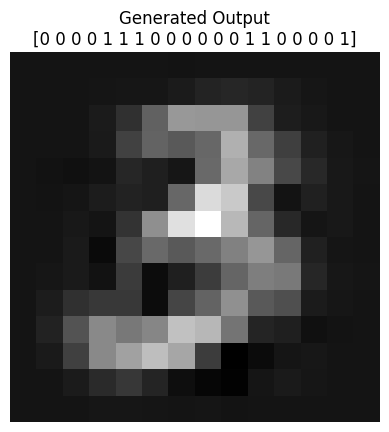

In [4]:
from src.utils.autoencoder_manager import generate_from_latent

generate_from_latent(binary_vae, params, latent_train[0], (14,14,1), True);

In [5]:
np.save("datasets/MNIST_14x14_latent_train.npy", latent_train)
np.save("datasets/MNIST_14x14_label_train.npy", labels_train)

np.save("datasets/MNIST_14x14_latent_test.npy", latent_test)
np.save("datasets/MNIST_14x14_label_test.npy", labels_test)

In [6]:
from datasets.latent_mnist import LatentDataset

ds_train = LatentDataset("datasets/MNIST_14x14_latent_train.npy",
                      "datasets/MNIST_14x14_label_train.npy",
                      batch_size=64).load()

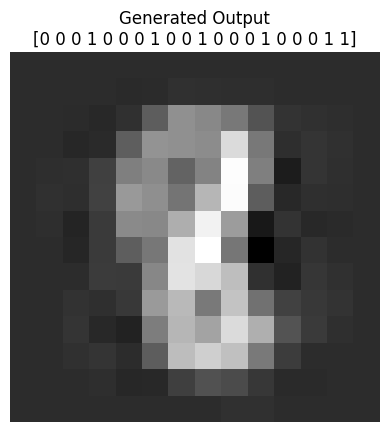

In [7]:
for batch in ds_train:
    generate_from_latent(binary_vae, params, batch[0][0], (14,14,1), True);
    break